***Task 4: Predicting Insurance Claim Amounts***

## 📌 Problem Statement

The objective is to predict the medical insurance charges of individuals using regression modeling techniques. This task involves understanding how features like age, BMI, and smoking status influence charges, and evaluating the model using MAE and RMSE.


**Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Load Dataset**

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Check Structure and Clean Data**

In [3]:
# Dataset info
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Encode Categorical Variables**

In [4]:
# One-hot encode categorical variables (like sex, smoker, region)
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


**Visualize Relationships**

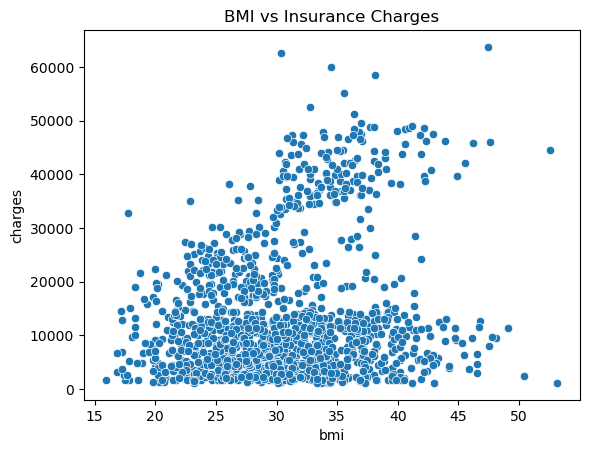

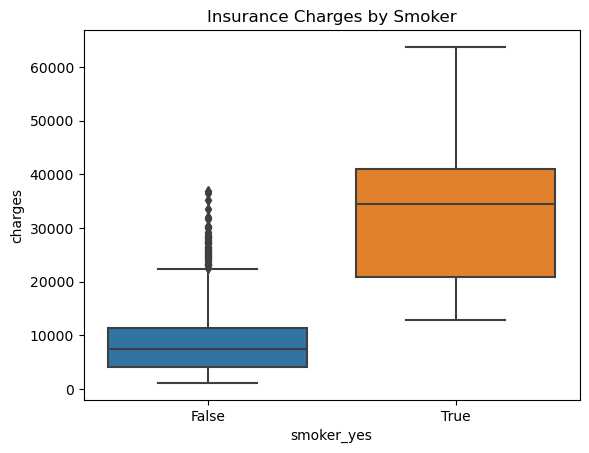

In [5]:
# BMI vs Charges
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('BMI vs Insurance Charges')
plt.show()

# Charges by Smoking Status
sns.boxplot(x='smoker_yes', y='charges', data=df)
plt.title('Insurance Charges by Smoker')
plt.show()

**Prepare Features and Labels**

In [6]:
X = df.drop('charges', axis=1)  # Features
y = df['charges']               # Target

**Train/Test Split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Linear Regression Model**

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Evaluate Model**

In [10]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4181.1944737536505
Root Mean Squared Error (RMSE): 5796.284659276273


**Conclusion**

Conclusion

- A Linear Regression model was trained to predict medical insurance charges.
- Charges are highly influenced by `bmi` and `smoking status`, as shown in visualizations.
- The model performed reasonably well with MAE and RMSE indicating prediction accuracy.